# Decision Tree

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
heart = pd.read_excel("/content/heart new.xlsx")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [19]:
heart.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [20]:
# Checking the null values
heart.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [21]:
heart['oldpeak'].mode()[0]

np.float64(0.0)

In [22]:
# Filling the null values
heart['oldpeak']=heart['oldpeak'].fillna(heart['oldpeak'].mode()[0])

In [23]:
from sklearn import preprocessing

In [24]:
# converting categorical variables to numeric
label_encoder = preprocessing.LabelEncoder()
heart['sex']= label_encoder.fit_transform(heart['sex'])
heart['cp']= label_encoder.fit_transform(heart['cp'])
heart['fbs']= label_encoder.fit_transform(heart['fbs'])
heart['restecg']= label_encoder.fit_transform(heart['restecg'])
# Convert 'exang' column to a consistent data type before encoding
heart['exang'] = heart['exang'].astype(str)  # Convert to string
heart['exang']= label_encoder.fit_transform(heart['exang'])
heart['slope']= label_encoder.fit_transform(heart['slope'])
heart['thal']= label_encoder.fit_transform(heart['thal'])

In [25]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1,1.5,2,1,4
904,62,1,0,166,170,0,2,120,3,3.0,1,1,4
905,56,1,2,170,0,0,0,123,3,2.5,0,2,4
906,56,1,2,144,208,1,2,105,2,0.0,0,1,4


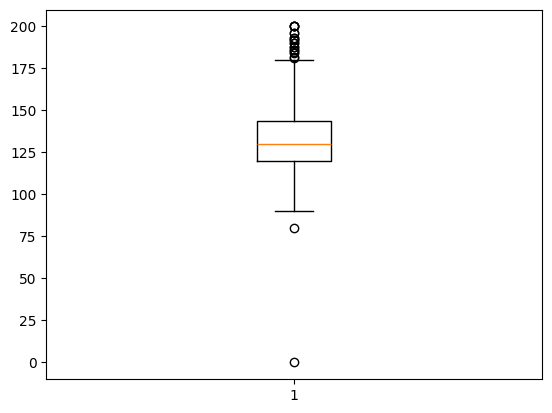

In [26]:
plt.boxplot(heart['trestbps'])
plt.show()

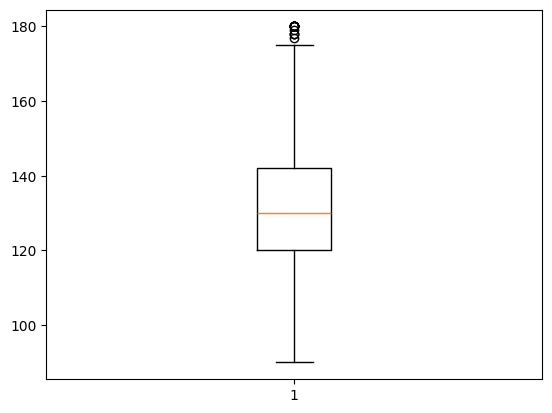

In [27]:
Q1 = heart['trestbps'].quantile(0.25)
Q3 = heart['trestbps'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
heart = heart[(heart['trestbps'] >= lower_bound) & (heart['trestbps'] <= upper_bound)]
plt.boxplot(heart['trestbps'])
plt.show()

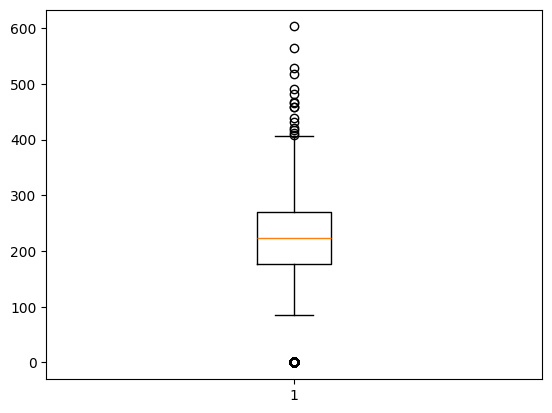

In [28]:
plt.boxplot(heart['chol'])
plt.show()

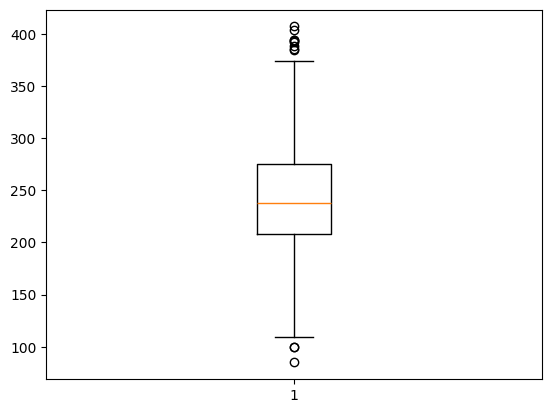

In [29]:
Q1 = heart['chol'].quantile(0.25)
Q3 = heart['chol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
heart = heart[(heart['chol'] >= lower_bound) & (heart['chol'] <= upper_bound)]
plt.boxplot(heart['chol'])
plt.show()

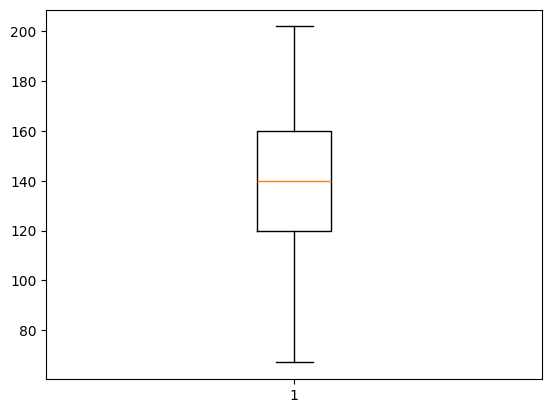

In [30]:
plt.boxplot(heart['thalch'])
plt.show()

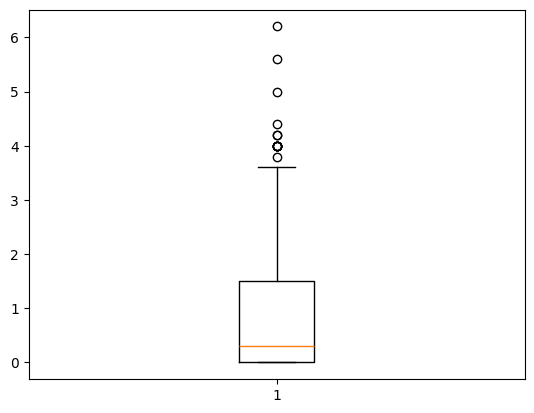

In [31]:
plt.boxplot(heart['oldpeak'])
plt.show()

In [32]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,65,1,0,136,248,0,1,140,3,4.0,0,0,4
902,62,1,0,160,254,1,2,108,3,3.0,1,1,4
904,62,1,0,166,170,0,2,120,3,3.0,1,1,4
906,56,1,2,144,208,1,2,105,2,0.0,0,1,4


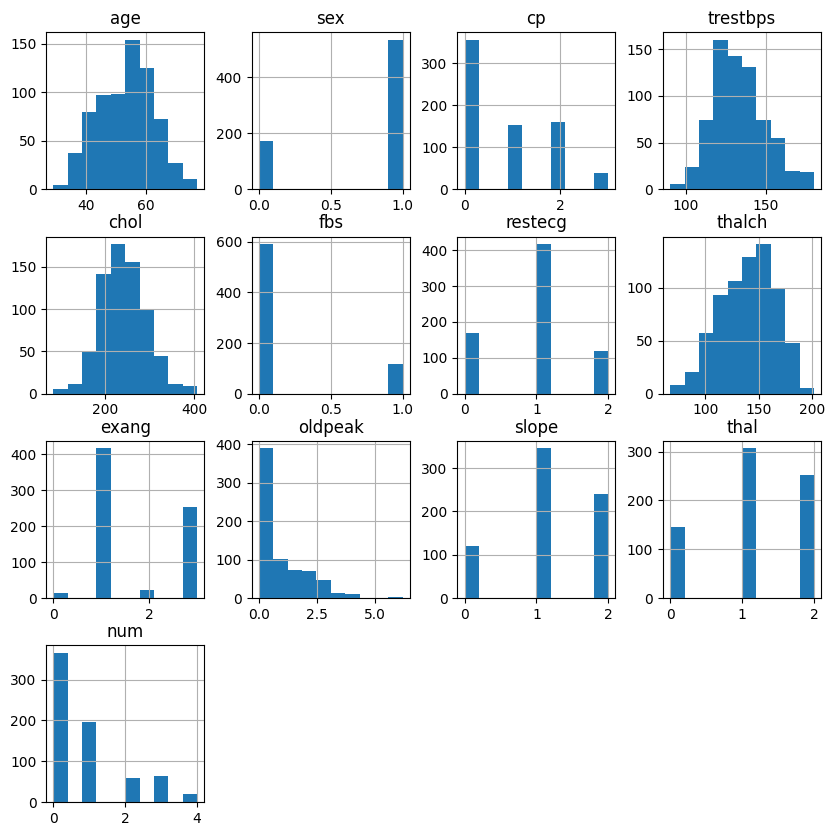

In [33]:
# Histogram plot
heart.hist(figsize=(10,10))
plt.show()

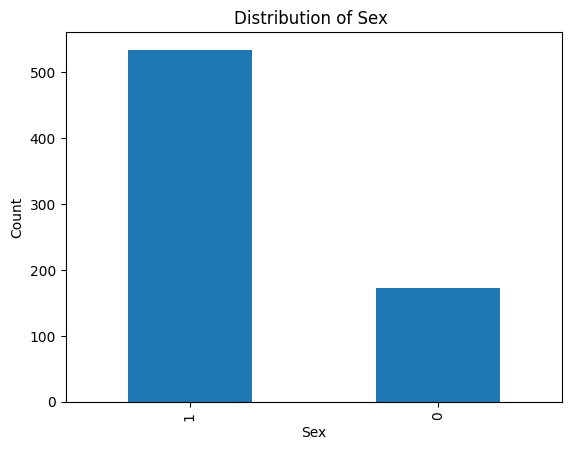

In [34]:
heart['sex'].value_counts().plot(kind = "bar")
# Add labels
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex ')
# Show the plot
plt.show()

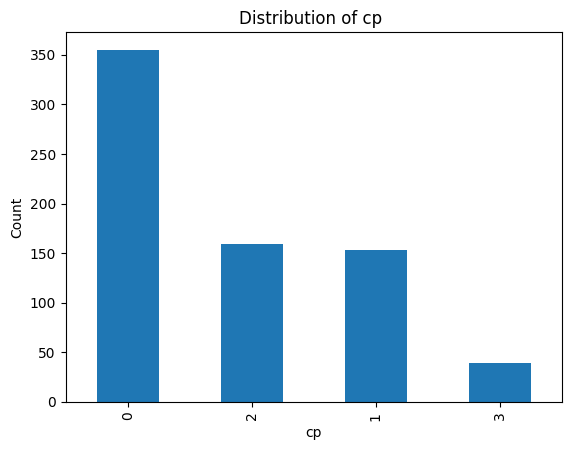

In [35]:
heart['cp'].value_counts().plot(kind = "bar")
# Add labels
plt.xlabel('cp')
plt.ylabel('Count')
plt.title('Distribution of cp ')
# Show the plot
plt.show()

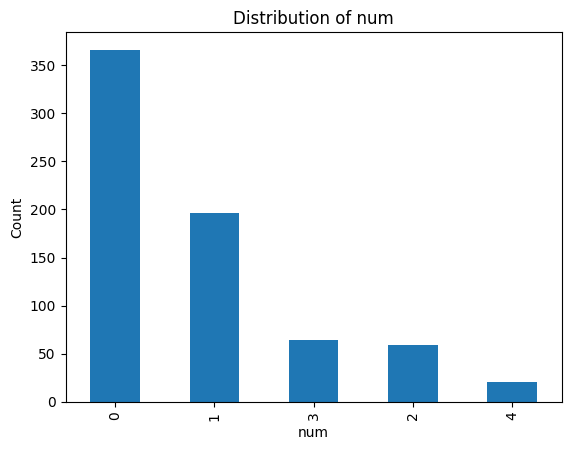

In [36]:
heart['num'].value_counts().plot(kind = "bar")
# Add labels
plt.xlabel('num')
plt.ylabel('Count')
plt.title('Distribution of num')
# Show the plot
plt.show()

In [37]:
#correlation between the variables
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,0.044096,-0.083605,0.257881,0.065498,0.213773,-0.050277,-0.333079,0.187518,0.218004,-0.025882,0.077428,0.356532
sex,0.044096,1.000000,-0.119467,0.043251,-0.090046,0.091367,0.031451,-0.146436,0.171144,0.109410,-0.051214,0.027192,0.245668
cp,-0.083605,-0.119467,1.000000,-0.011623,-0.125200,0.017477,-0.051490,0.270447,-0.398148,-0.219864,0.104391,-0.060363,-0.328535
trestbps,0.257881,0.043251,-0.011623,1.000000,0.138693,0.166410,0.073556,-0.153649,0.116199,0.160281,0.009604,-0.001359,0.174571
chol,0.065498,-0.090046,-0.125200,0.138693,1.000000,0.034125,-0.063246,-0.004701,0.109728,0.048826,0.030304,-0.009396,0.065966
fbs,0.213773,0.091367,0.017477,0.166410,0.034125,1.000000,0.036366,-0.084973,0.039949,-0.019189,-0.025996,-0.023780,0.139477
restecg,-0.050277,0.031451,-0.051490,0.073556,-0.063246,0.036366,1.000000,-0.183946,0.061074,-0.061738,-0.137016,-0.086419,-0.034588
thalch,-0.333079,-0.146436,0.270447,-0.153649,-0.004701,-0.084973,-0.183946,1.000000,-0.334376,-0.188287,0.210657,0.015855,-0.291723
exang,0.187518,0.171144,-0.398148,0.116199,0.109728,0.039949,0.061074,-0.334376,1.000000,0.428172,-0.162314,0.111746,0.382395
oldpeak,0.218004,0.109410,-0.219864,0.160281,0.048826,-0.019189,-0.061738,-0.188287,0.428172,1.000000,-0.214862,0.089889,0.487179


<Axes: >

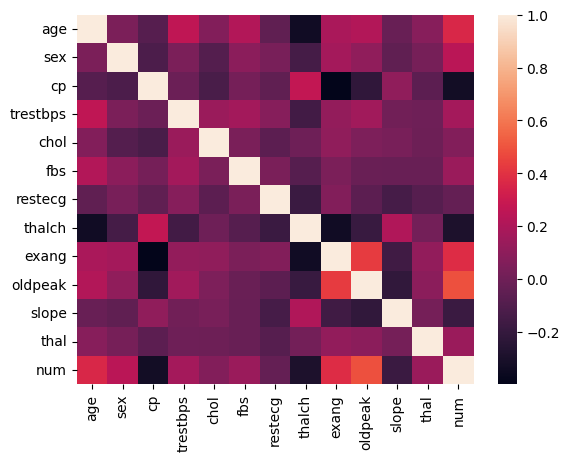

In [38]:
sns.heatmap(heart.corr())

In [39]:
heart=heart.drop(["age"],axis=1)
x=heart.iloc[:,0:11]
y=heart['num']
x

,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1,3,145,233,1,0,150,1,2.3,0,0
1,1,1,135,203,0,1,132,1,0.0,1,0
2,1,0,140,192,0,1,148,1,0.4,1,0
3,1,3,118,186,0,0,190,1,0.0,1,0
4,1,0,110,201,0,1,126,3,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
899,1,0,136,248,0,1,140,3,4.0,0,0
902,1,0,160,254,1,2,108,3,3.0,1,1
904,1,0,166,170,0,2,120,3,3.0,1,1
906,1,2,144,208,1,2,105,2,0.0,0,1


In [40]:
y

,num
0,0
1,0
2,0
3,0
4,0
...,...
899,4
902,4
904,4
906,4


In [41]:
heart['num'].unique()

array([0, 1, 2, 3, 4])

In [42]:
colnames = list(heart.columns)
colnames

['sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal',
 'num']

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(564, 11) (142, 11) (564,) (142,)


In [44]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [45]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

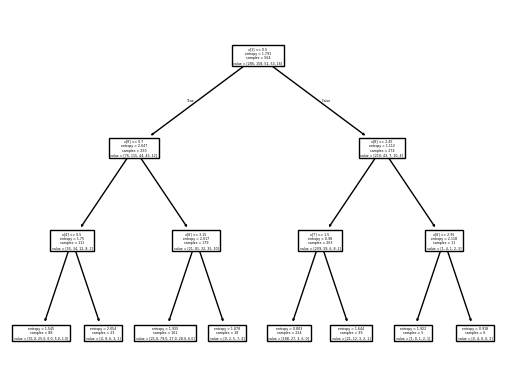

In [46]:
tree.plot_tree(model);

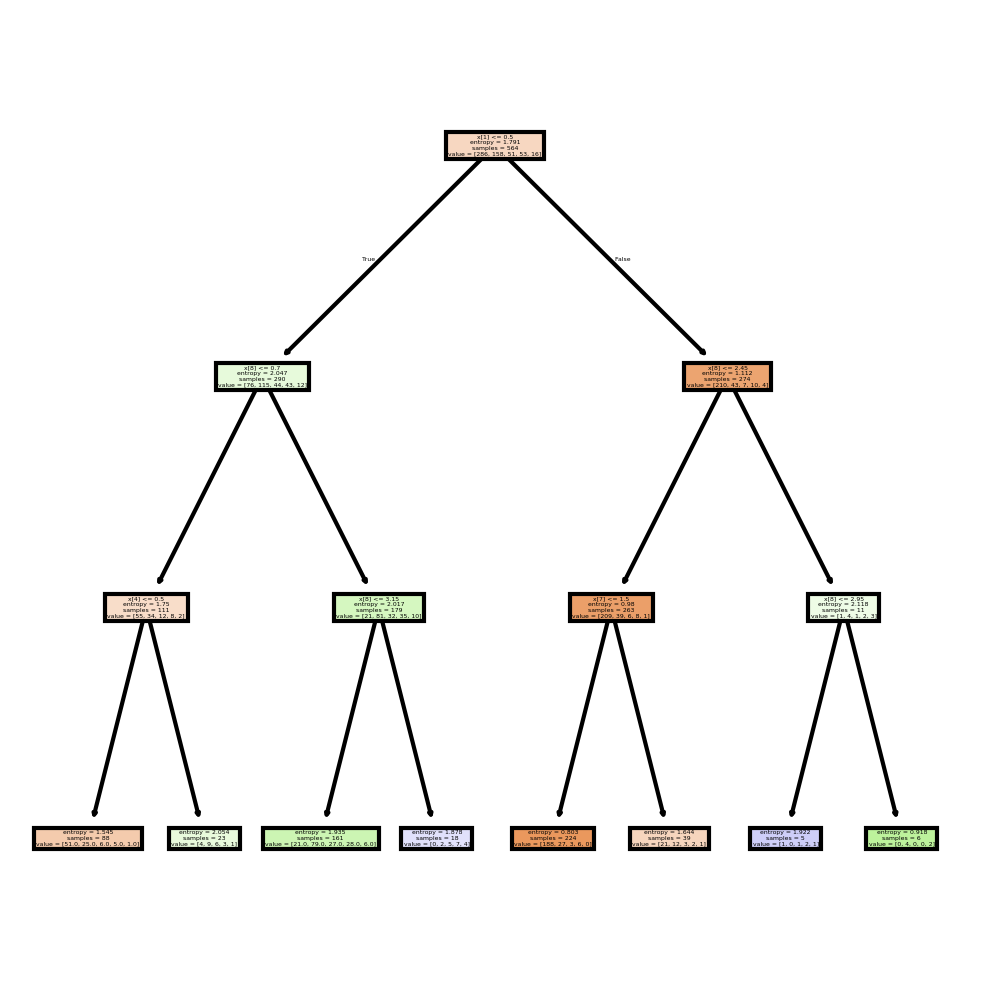

In [47]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model, filled = True);

In [48]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

,count
0,98
1,43
3,1


In [49]:
pd.crosstab(y_test,preds)

col_0,0,1,3
num,,,
0,72,8,0
1,20,18,0
2,3,5,0
3,3,8,0
4,0,4,1


In [50]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81        80
           1       0.42      0.47      0.44        38
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         5

    accuracy                           0.63       142
   macro avg       0.23      0.27      0.25       142
weighted avg       0.53      0.63      0.57       142



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
np.mean(preds==y_test)

np.float64(0.6338028169014085)

In [52]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [53]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [54]:
pred=model_gini.predict(x_test)
np.mean(preds==y_test)

np.float64(0.6338028169014085)

In [55]:
model1_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model1_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [56]:
pred=model1_gini.predict(x_test)
np.mean(preds==y_test)

np.float64(0.6338028169014085)

In [57]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

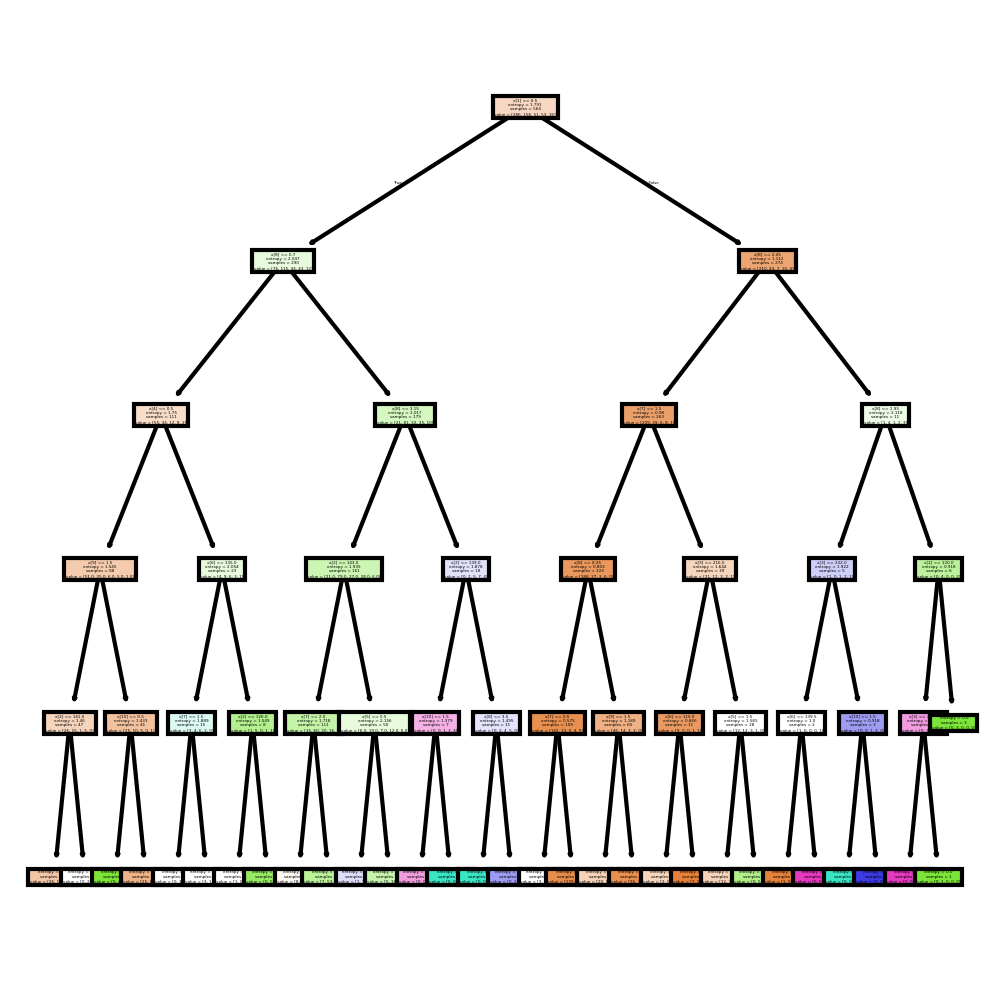

In [58]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model1, filled = True);

In [59]:
pred=model1.predict(x_test)
np.mean(preds==y_test)

np.float64(0.6338028169014085)

In [60]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=7)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [61]:
pred=model2.predict(x_test)
np.mean(preds==y_test)

np.float64(0.6338028169014085)

# Interview Questions

# 1. Common Hyperparameters of Decision Tree Models and Their Effects on

### Max Depth:
This limits the depth of the tree (i.e., how many splits are made). A deeper tree can capture more complexity in the data, but it risks overfitting. A shallower tree may generalize better but might underfit.
### Min Samples Split:
The minimum number of samples required to split an internal node. Higher values reduce the chance of overfitting, as the model will not create very specific splits on small sample sizes.
### Min Samples Leaf:
The minimum number of samples that must be present in a leaf node. Larger values can smooth the model, avoiding splits that result in leaves with very few data points.
### Max Features:
The number of features to consider when looking for the best split. Limiting the number of features can reduce overfitting and improve computation time, but it may miss important patterns in the data.
### Criterion:
The function used to measure the quality of a split. Common criteria are Gini Impurity and Information Gain (Entropy). Gini is computationally less expensive, but both typically give similar results.
### Effects on Performance:
Hyperparameters directly affect the trade-off between underfitting and overfitting.
For instance:
Increasing max depth can help capture more complex patterns but may lead to overfitting if the tree becomes too deep.List item
Adjusting the minimum samples per split or leaf can prevent overfitting by ensuring the splits are not made on very small, potentially noisy, subsets of the data.

# 2. Difference Between Label Encoding and One-Hot Encoding:

### Label Encoding:
This assigns a unique integer value to each category (e.g., "Red" becomes 0, "Blue" becomes 1, "Green" becomes 2). Label encoding is typically used when the categories have an ordinal relationship (e.g., "Low", "Medium", "High"). However, if used on non-ordinal categorical features, it can lead to incorrect assumptions in the model about the relative magnitude between the encoded values.
### One-Hot Encoding:
This converts categorical variables into a set of binary (0 or 1) variables for each category. For example, if a feature has three categories (e.g., "Red", "Blue", "Green"), it creates three new binary columns, one for each category. One-hot encoding is suitable for nominal categories (no intrinsic order). It avoids the problem of implying a rank or order, but can increase the dimensionality of the dataset, especially when dealing with a large number of categories.
### In Summary:
Label Encoding is more compact and better for ordinal data, but can introduce biases when used for nominal categories. One-Hot Encoding is better for nominal data but may increase dimensionality, which can affect the performance of some machine learning algorithms.
